# Detección de Mascarillas - OpenCV y Keras

In [1]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np

In [2]:
#Instanciamos el modelo y generamos 
model =Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
#Compilacion del modelo, se usa optimizador 'adam' y loss 'binary_crossentropy' por ser más optimo para modelos de clasificación
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [5]:
#Comprobamos si tenemos imagenes en nuestra data que genere problemas en la evaluacion(mala extensión,tamaño irregular, etc)
import os
from PIL import Image
folder_path = 'D:/MiniProyectos_Python/Dataset/train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1]) 

In [6]:
#Generamos la data de entrenamiento y testeo
TRAINING_DIR = "D:/MiniProyectos_Python/Dataset/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))

VALIDATION_DIR = "D:/MiniProyectos_Python/Dataset/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 6345 images belonging to 2 classes.
Found 2716 images belonging to 2 classes.


In [7]:
#Creamos un checkpoint para guardar el modelo
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [8]:
#Empezamos el entrenamiento del modelo
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

D:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
635/635 [==============================] - 401s 627ms/step - loss: 0.5659 - acc: 0.7144 - val_loss: 0.3127 - val_acc: 0.8818
INFO:tensorflow:Assets written to: model2-001.model\assets
Epoch 2/10
418/635 [==================>...........] - ETA: 2:36 - loss: 0.3754 - acc: 0.8400

D:\Anaconda\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


635/635 [==============================] - 530s 834ms/step - loss: 0.3781 - acc: 0.8366 - val_loss: 0.2848 - val_acc: 0.8888
INFO:tensorflow:Assets written to: model2-002.model\assets
Epoch 3/10
304/635 [=============>................] - ETA: 4:32 - loss: 0.3822 - acc: 0.8227

D:\Anaconda\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


635/635 [==============================] - 566s 891ms/step - loss: 0.3769 - acc: 0.8295 - val_loss: 0.2864 - val_acc: 0.8973
Epoch 4/10
635/635 [==============================] - 455s 716ms/step - loss: 0.3549 - acc: 0.8496 - val_loss: 0.2785 - val_acc: 0.8873
INFO:tensorflow:Assets written to: model2-004.model\assets
Epoch 5/10
 15/635 [..............................] - ETA: 9:50 - loss: 0.4570 - acc: 0.8212

D:\Anaconda\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


635/635 [==============================] - 694s 1s/step - loss: 0.3395 - acc: 0.8563 - val_loss: 0.2746 - val_acc: 0.8951
INFO:tensorflow:Assets written to: model2-005.model\assets
Epoch 6/10
282/635 [============>.................] - ETA: 5:53 - loss: 0.3364 - acc: 0.8472

D:\Anaconda\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


635/635 [==============================] - 694s 1s/step - loss: 0.3282 - acc: 0.8511 - val_loss: 0.2858 - val_acc: 0.8825
Epoch 7/10
635/635 [==============================] - 483s 760ms/step - loss: 0.3301 - acc: 0.8649 - val_loss: 0.2398 - val_acc: 0.9006
INFO:tensorflow:Assets written to: model2-007.model\assets
Epoch 8/10
  5/635 [..............................] - ETA: 6:54 - loss: 0.2476 - acc: 0.8920

D:\Anaconda\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


635/635 [==============================] - 592s 932ms/step - loss: 0.3039 - acc: 0.8734 - val_loss: 0.2654 - val_acc: 0.8888
Epoch 9/10
635/635 [==============================] - 450s 709ms/step - loss: 0.2900 - acc: 0.8791 - val_loss: 0.2409 - val_acc: 0.9054
Epoch 10/10
635/635 [==============================] - 506s 797ms/step - loss: 0.2710 - acc: 0.8816 - val_loss: 0.2351 - val_acc: 0.9068
INFO:tensorflow:Assets written to: model2-010.model\assets


In [16]:
#Resumen del modelo desarrollado
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 100)       90100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0         
_________________________________________________________________
dropout (Dropout)            (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 50)                6

In [9]:
#Cargamos el modelo guardado anteriormente
import cv2
import numpy as np
from keras.models import load_model
model=load_model("./model2-010.model")

In [10]:
labels_dict={0:'without mask',1:'mask'}
GR_dict={0:(0,0,255),1:(0,255,0)}

In [11]:
rect_size = 4
webcam = cv2.VideoCapture(0) #Usamos la camara con parametro 0, parametro 1 desactiva la camara

In [12]:
haarcascade = cv2.CascadeClassifier('D:/Anaconda/Library/etc/haarcascades/haarcascade_frontalface_alt.xml')
#la ruta debe modificarse, a la ubicacion del archivo haarcascade_frontalface_alt.xml en su PC

In [13]:
#Generamos la ventana LIVE y probamos la efectividad del modelo
while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1,1) 
    
    rerect_size = cv2.resize(im, (im.shape[1]//rect_size, im.shape[0]//rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(150,150))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        
        label=np.argmax(result,axis=1)[0]
          
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    cv2.imshow('LIVE', im)
    key = cv2.waitKey(10)
    if key == 27: #Equivale a ESC
        break
webcam.release()
cv2.destroyAllWindows()
#Presionar ESC para salir de la ventana

## Pruebas con Mascarilla - (BLANCA Y NEGRA)

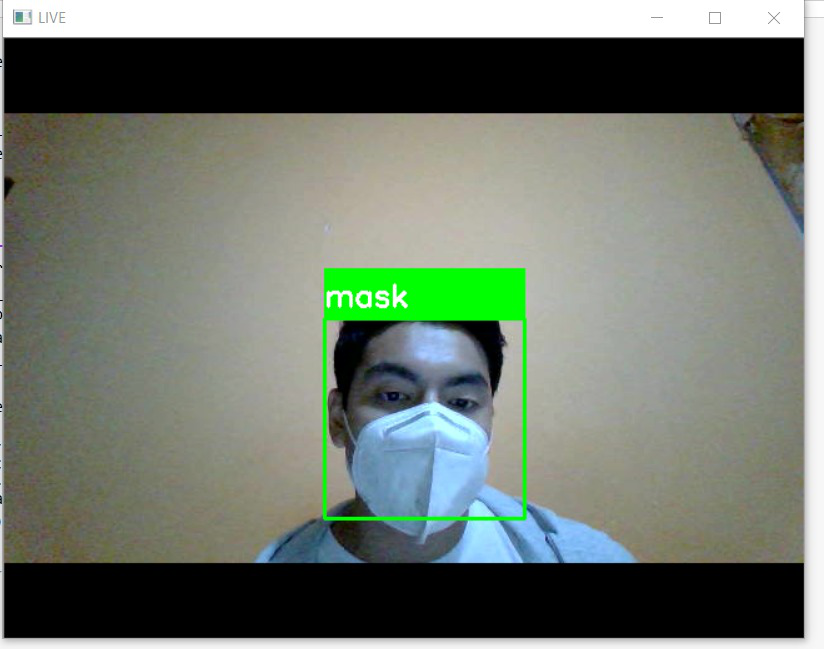

In [19]:
from PIL import Image
imagen = Image.open("D:\MiniProyectos_Python\MaskDetection\pruebaConMascarilla1.jpeg")
imagen

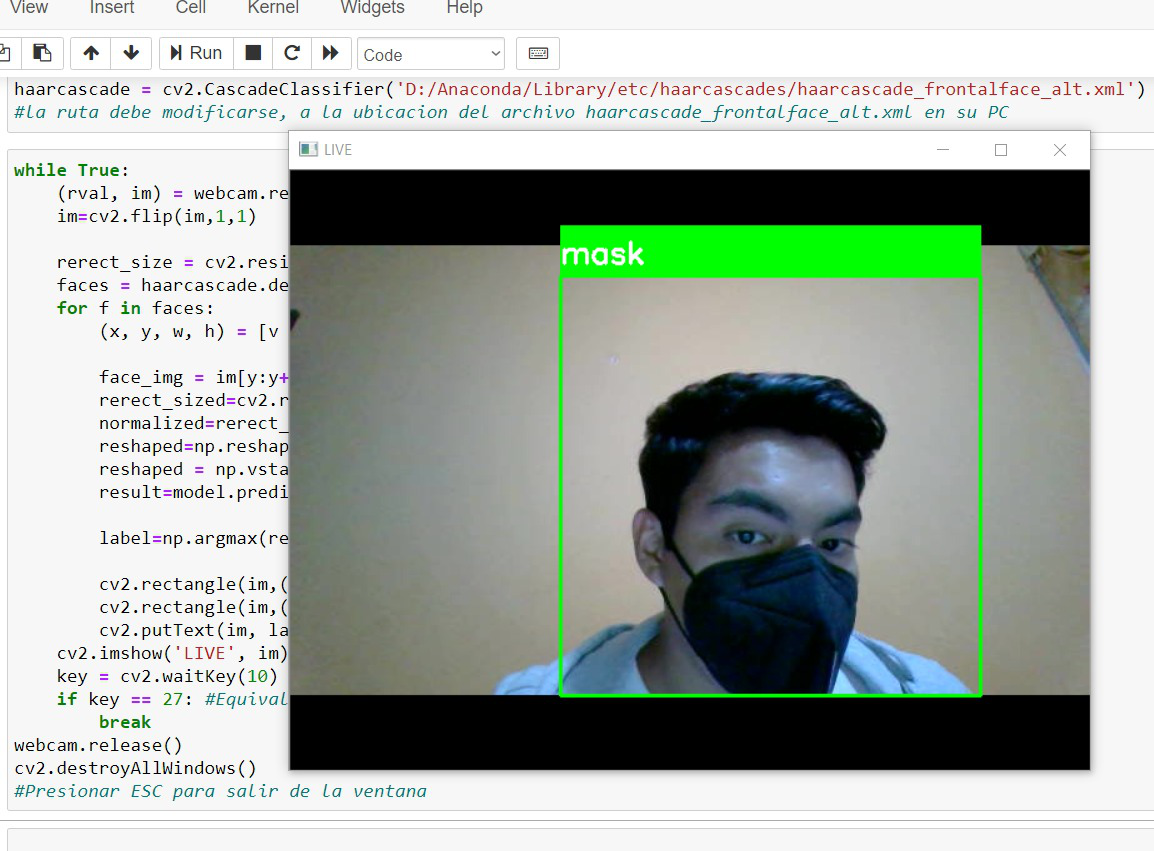

In [20]:
imagen = Image.open("D:\MiniProyectos_Python\MaskDetection\pruebaConMascarilla2.jpeg")
imagen

## Prueba sin Mascarillas ( con/sin objetos adicionles)

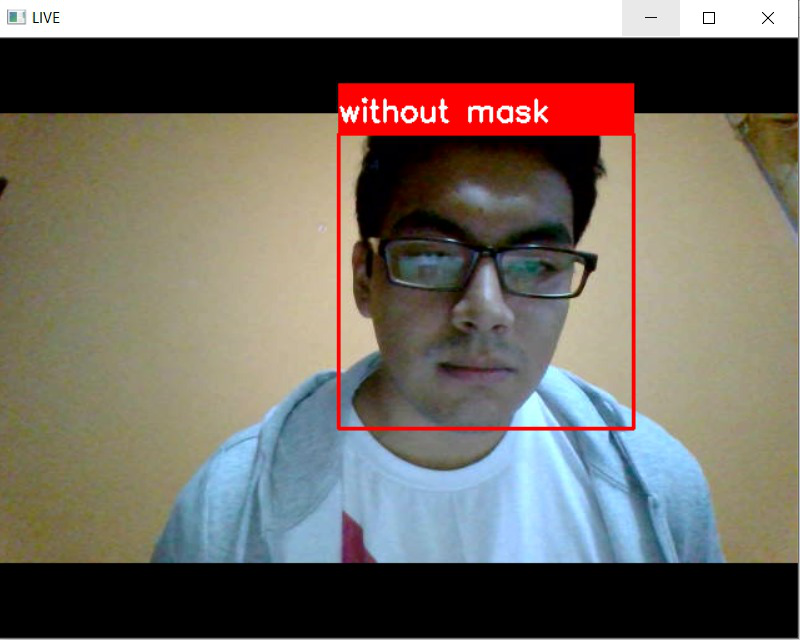

In [21]:
imagen = Image.open("D:\MiniProyectos_Python\MaskDetection\pruebaSinMascarilla1.jpeg")
imagen

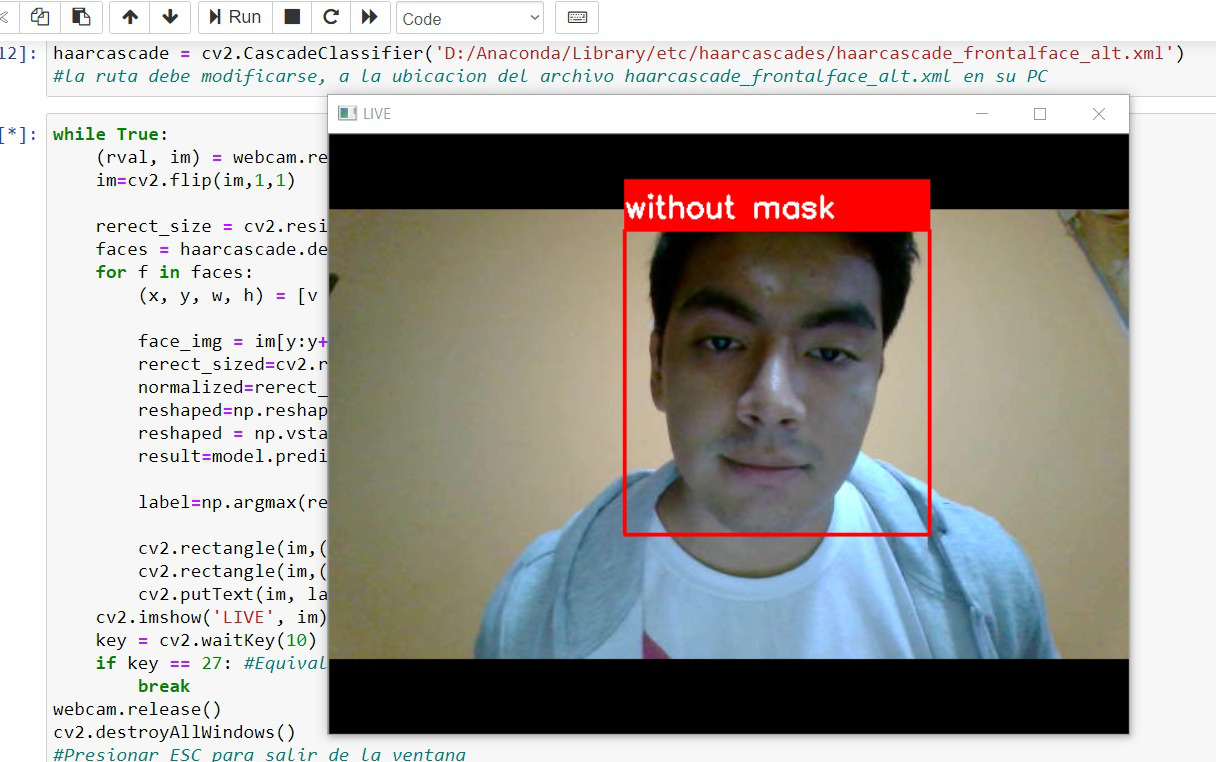

In [22]:
imagen = Image.open("D:\MiniProyectos_Python\MaskDetection\pruebaSinMascarilla2.jpeg")
imagen